### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Load the dataset

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age', 'EstimatedSalary', 'Purchased']] # df.iloc[:, 2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
115,40,57000,0
307,47,113000,1
22,48,41000,1
45,23,20000,0
103,33,149000,1


In [6]:
df.shape

(400, 3)

### Train Test Split

In [7]:
X, y = df.iloc[:, 0:2], df.iloc[:, 2]
X.shape, y.shape

((400, 2), (400,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [11]:
type(X_train), type(X_train_scaled)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [12]:
type(X_test), type(X_test_scaled)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
X_train.head()

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000


In [15]:
X_train_scaled.head(5)

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318


In [16]:
X_test.head()

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000


In [17]:
X_test_scaled.head()

,Age,EstimatedSalary
0,0.827784,-1.433827
1,2.105076,0.513775
2,-0.940775,-0.784626
3,1.024290,0.749848
4,-0.842522,-1.256772


In [18]:
X_train.describe().round(2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.58,70589.29
std,10.20,33948.50
min,18.00,15000.00
25%,30.00,44000.00
50%,37.00,71000.00
75%,45.00,88000.00
max,60.00,150000.00


In [19]:
X_train_scaled.describe().round(2)

,Age,EstimatedSalary
count,280.00,280.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.92,-1.64
25%,-0.74,-0.78
50%,-0.06,0.01
75%,0.73,0.51
max,2.20,2.34


**Clearly the MEAN of the scaled data is ZERO and STANDARD DEVIATION is ONE.**

### Effect of Scaling

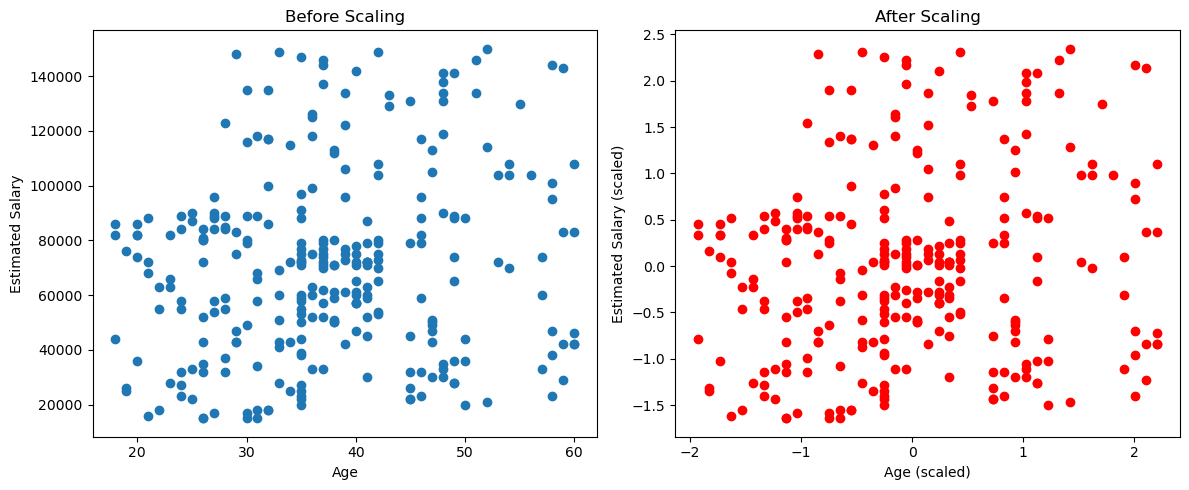

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

# After Scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
ax2.set_xlabel('Age (scaled)')
ax2.set_ylabel('Estimated Salary (scaled)')

plt.tight_layout()
plt.show()

* Notice the change in the X & Y axis values

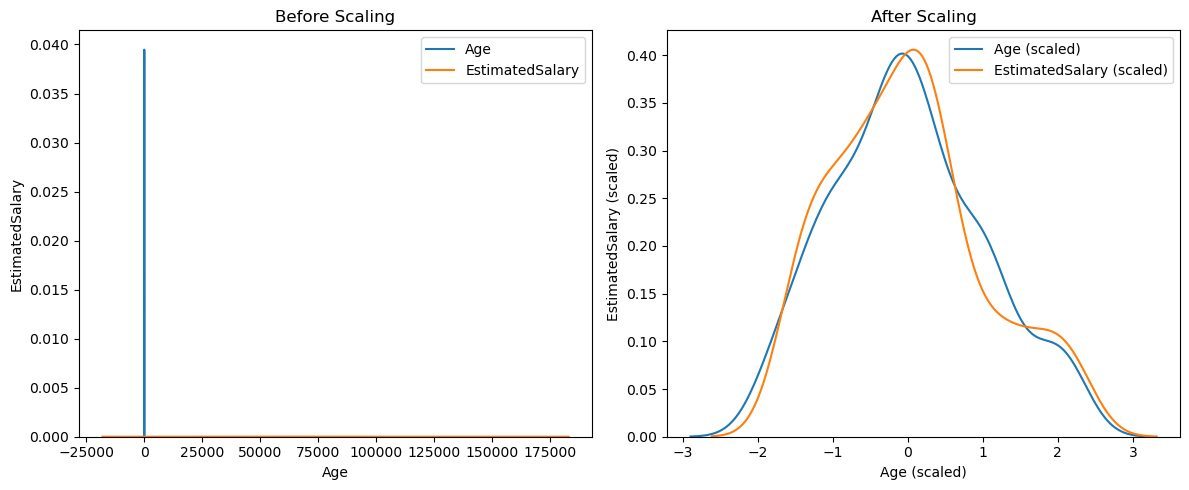

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(data=X_train, x='Age', ax=ax1, label='Age')
sns.kdeplot(data=X_train, x='EstimatedSalary', ax=ax1, label='EstimatedSalary')
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.legend()

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(data=X_train_scaled, x='Age', ax=ax2, label='Age (scaled)')
sns.kdeplot(data=X_train_scaled, x='EstimatedSalary', ax=ax2, label='EstimatedSalary (scaled)')
ax2.set_xlabel('Age (scaled)')
ax2.set_ylabel('EstimatedSalary (scaled)')
ax2.legend()

plt.tight_layout()
plt.show()

### Comparison of Distributions

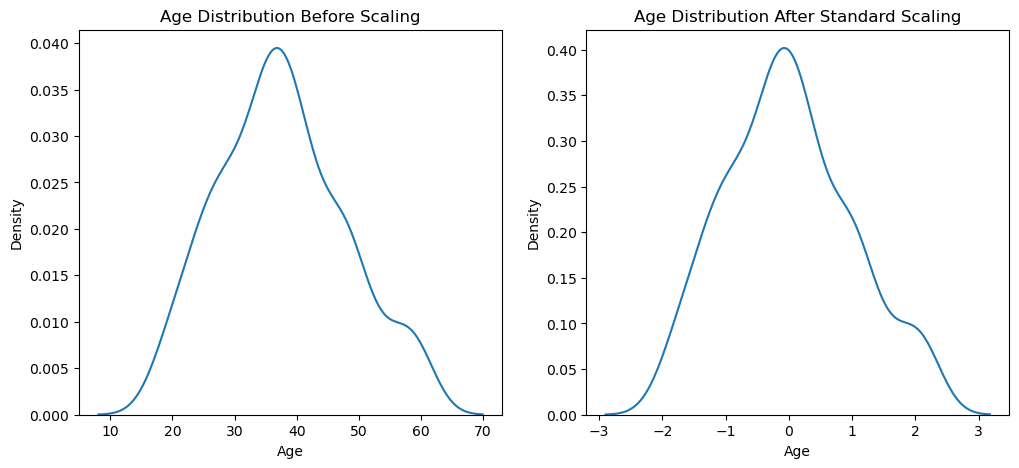

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(data=X_train, x='Age', ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(data=X_train_scaled, x='Age', ax=ax2)
plt.show()

**Only the scale of the data is changed, not the distribution of the data.**

### Why scaling is important? - Logistic Regression

In [23]:
lr, lr_scaled = LogisticRegression(), LogisticRegression()

In [24]:
lr.fit(X_train, y_train), lr_scaled.fit(X_train_scaled, y_train)

(LogisticRegression(), LogisticRegression())

In [25]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [26]:
print("Accuracy (without scaling): ", accuracy_score(y_test, y_pred))
print("Accuracy (with scaling): ", accuracy_score(y_test, y_pred_scaled))

Accuracy (without scaling):  0.85
Accuracy (with scaling):  0.85


### Decision Tree

In [27]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [30]:
print("Accuracy (without scaling): ", accuracy_score(y_test, y_pred))
print("Accuracy (with scaling): ", accuracy_score(y_test, y_pred_scaled))

Accuracy (without scaling):  0.8666666666666667
Accuracy (with scaling):  0.8416666666666667


**Summary**:

*Scaling is not about improving accuracy per se, but ensuring that algorithms behave correctly.*

Even if unscaled data "works," scaling helps:
* Avoid bias toward larger-magnitude features,
* Improve convergence (especially in logistic regression or neural nets),
* Stabilize regularization.

### Effect of Scaling on the Outliers

In [31]:
new_rows = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_rows], ignore_index=True)

In [32]:
df.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


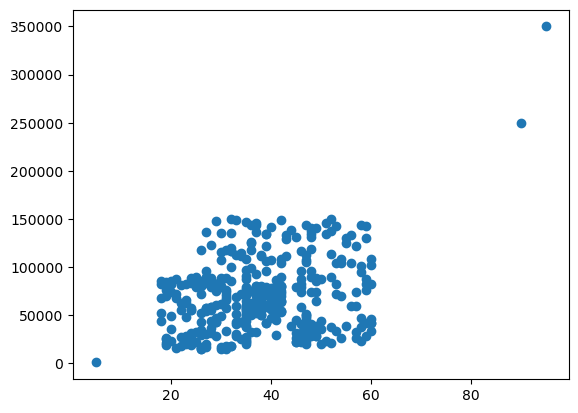

In [33]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.show();

In [34]:
X, y = df.iloc[:, 0:2], df.iloc[:, 2]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

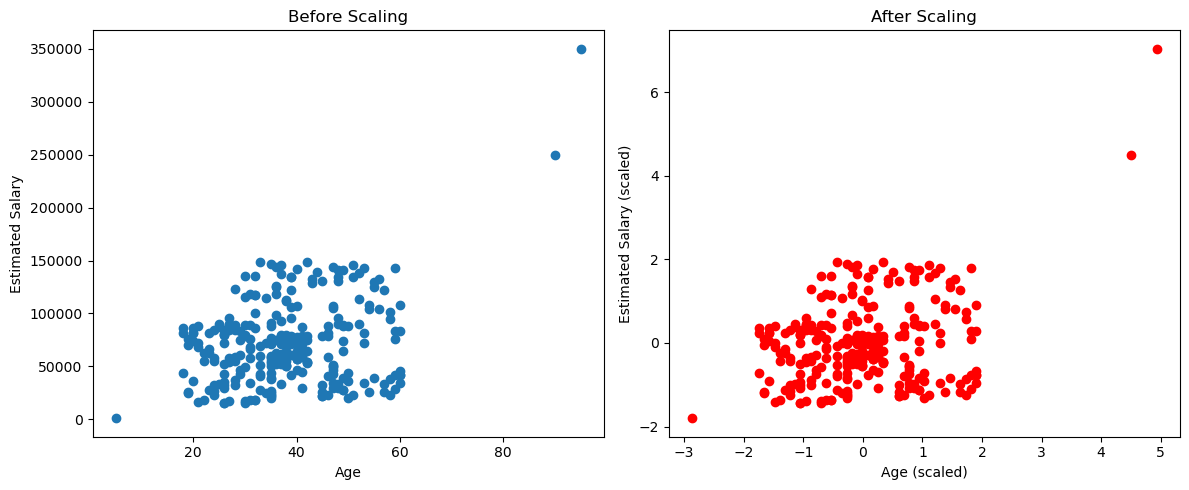

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

# After Scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
ax2.set_xlabel('Age (scaled)')
ax2.set_ylabel('Estimated Salary (scaled)')

plt.tight_layout()
plt.show()

**The outliers can still be seen which means that the Standardization does not the remove the outliers. It'll only scale it.**

### When to use Standardization

![Alt Text](data/When-to-use-scaling.png)

* Scaling can be ignored for the following algorithms -
    * Decision Trees
    * Random Forest Classifier
    * Boosting and Bagging   